# Méthode EDP - Vérification des calculs  <a class="tocSkip">

Le but de ce notebook est de vérifier que les calculs que l'on fait à partir de l'EDP présentée dans la partie IV sont cohérents avec les observations. On va vérifier que les fonctions
$$t\mapsto\ln|Fu_t(\xi)|$$
$$t\mapsto\arg|Fu_t(\xi)|$$

sont affines pour $\xi$ fixé, comme affirmé dans le rapport.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialisation" data-toc-modified-id="Initialisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialisation</a></span><ul class="toc-item"><li><span><a href="#Données" data-toc-modified-id="Données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Données</a></span></li><li><span><a href="#Fonctions-générales" data-toc-modified-id="Fonctions-générales-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fonctions générales</a></span></li></ul></li><li><span><a href="#Estimation-de-$a_{\xi}$" data-toc-modified-id="Estimation-de-$a_{\xi}$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimation de $a_{\xi}$</a></span><ul class="toc-item"><li><span><a href="#Travail-sur-l'estimation-de-$\Re(a_{\xi})$" data-toc-modified-id="Travail-sur-l'estimation-de-$\Re(a_{\xi})$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Travail sur l'estimation de $\Re(a_{\xi})$</a></span><ul class="toc-item"><li><span><a href="#Petites-valeurs-de-$\xi$" data-toc-modified-id="Petites-valeurs-de-$\xi$-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Petites valeurs de $\xi$</a></span></li><li><span><a href="#Valeurs-de-$\xi$-moyennes" data-toc-modified-id="Valeurs-de-$\xi$-moyennes-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Valeurs de $\xi$ moyennes</a></span></li><li><span><a href="#Grandes-valeurs-de-$\xi$" data-toc-modified-id="Grandes-valeurs-de-$\xi$-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Grandes valeurs de $\xi$</a></span></li></ul></li><li><span><a href="#Travail-sur-l'estimation-de-$\Im(a_{\xi})$" data-toc-modified-id="Travail-sur-l'estimation-de-$\Im(a_{\xi})$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Travail sur l'estimation de $\Im(a_{\xi})$</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import csv
from scipy import stats
%matplotlib inline

# Initialisation
## Données

In [2]:
with open('Donnees_simulees/growthR_sim.npy', 'rb') as f:
    wt_sim = np.load(f)
    wt_sim = wt_sim[:,wt_sim[0,:]!=0]
with open('Donnees_simulees/growthR_sim_noisy.npy', 'rb') as f:
    wt_sim_noise = np.load(f)
    wt_sim_noise = wt_sim_noise[:,wt_sim_noise[0,:]!=0]

## Fonctions générales

Fonctions liées à la transformée de Fourier :

In [3]:
def get_fourier_wt(Xi,Wt):
    return [np.mean(np.exp(-1j*xi*Wt[Wt>0])) for xi in Xi]

def get_fourier_log_wt(Xi,Wt):
    return [np.mean(np.exp(-1j*xi*np.log(Wt[Wt>0]))) for xi in Xi]

Fonctions qui traçent les droites :

In [4]:
def draw_log_log(wt,ximin,ximax,nbreaks_xi,tmax,n_renorm=0,titre=""):
    
    Xi = np.linspace(ximin,ximax,nbreaks_xi)
    tot = np.abs([get_fourier_log_wt(Xi,wt[t]) for t in range(tmax)])
    
    if n_renorm > 0 :    # number of initial growth rate measures considered to renormalise
        tot = tot/np.median(tot[:n_renorm,:], axis=0)
    
    tot = np.log(tot)
        
    # régression linéaire:
    for k in range(nbreaks_xi):
        slope, intercept, r_value, p_value, std_err = stats.linregress(range(tmax),np.real(tot)[:,k])
        print("pente :",slope)
    # affichage:
    plt.plot(range(tmax),tot)
    plt.grid()
    plt.legend(["xi="+str(xi) for xi in Xi])
    plt.xlabel("t")
    plt.ylabel("ln|Fu_t(xi)|")
    plt.title(titre)
    plt.show() 

def draw_log_arg(wt,ximin,ximax,nbreaks_xi,tmax,n_renorm=0,titre=""):
    
    Xi = np.linspace(ximin,ximax,nbreaks_xi)
    tot = np.array([get_fourier_log_wt(Xi,wt[t]) for t in range(tmax)])
    
    if n_renorm > 0 :    # number of initial growth rate measures considered to renormalise
        tot = tot/np.median(tot[:n_renorm,:], axis=0)
    
    tot = np.angle(tot)
        
    # régression linéaire:
    for k in range(nbreaks_xi):
        slope, intercept, r_value, p_value, std_err = stats.linregress(range(tmax),np.real(tot)[:,k])
        print("pente :",slope)
    # affichage:
    plt.plot(range(tmax),tot)
    plt.grid()
    plt.legend(["xi="+str(xi) for xi in Xi])
    plt.xlabel("t")
    plt.ylabel("arg[Fu_t(xi)]")
    plt.title(titre)
    plt.show() 

# Estimation de $a_{\xi}$


## Travail sur l'estimation de $\Re(a_{\xi})$

### Petites valeurs de $\xi$

pente : -2.1475185804558568e-07
pente : -2.4405548886727866e-05
pente : -5.916363407445148e-05
pente : -8.957977476446621e-05
pente : -0.00012030404713433713


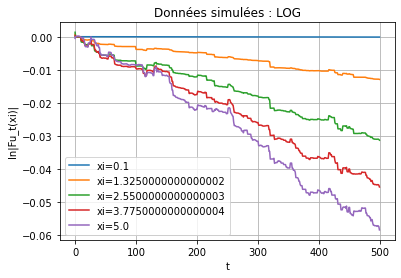

In [5]:
draw_log_log(wt_sim,ximin=0.1,ximax=5,nbreaks_xi=5,tmax=500,n_renorm=5,titre="Données simulées : LOG")

$\to$ les formes et les pentes sont similaires !

### Valeurs de $\xi$ moyennes

pente : -0.00012030404713433713
pente : -0.00016319508669070828
pente : -0.00019513822338142656
pente : -0.0002196890537973975
pente : -0.00021642314555815042


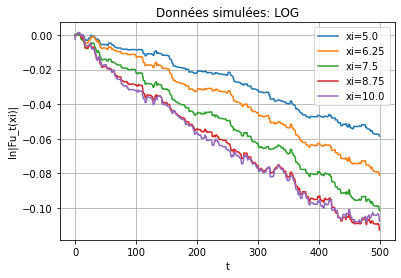

In [6]:
draw_log_log(wt_sim,ximin=5,ximax=10,nbreaks_xi=5,tmax=500,n_renorm=5,titre="Données simulées: LOG")

$\to$ la similarité est moins bonne quand $\xi$ augmente.

### Grandes valeurs de $\xi$


In [7]:
n = 5   # number of initial growth rate measures considered to renormalise
wt_sim_norm=wt_sim/np.median(wt_sim[:n,:], axis=0)

pente : -0.00021642314555815042
pente : -0.0006328977120935344
pente : -0.0016843068429100332
pente : -0.0017694603017342134
pente : 0.0002180435857469566


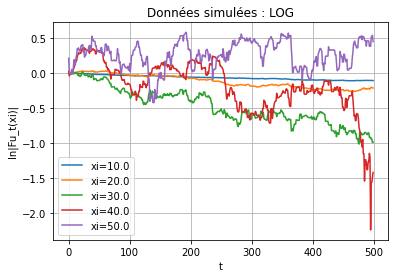

In [8]:
draw_log_log(wt_sim,ximin=10,ximax=50,nbreaks_xi=5,tmax=500,n_renorm=5,titre="Données simulées : LOG")

$\to$ on n'obtient plus de pentes.

## Travail sur l'estimation de $\Im(a_{\xi})$

pente : 9.043490918178768e-06
pente : 0.00010299236029665933
pente : 0.00016365000904522116
pente : 0.00020048607710601755
pente : 0.00023182073562300838


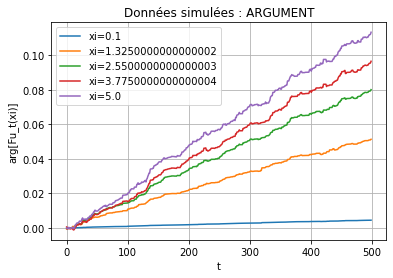

In [9]:
draw_log_arg(wt_sim,ximin=0.1,ximax=5,nbreaks_xi=5,tmax=500,n_renorm=5,titre="Données simulées : ARGUMENT")

pente : 0.0002727183701499111
pente : 0.0008431043400875078
pente : -0.0032733869159193674
pente : -0.0003925623811466496
pente : 0.002499320824550395


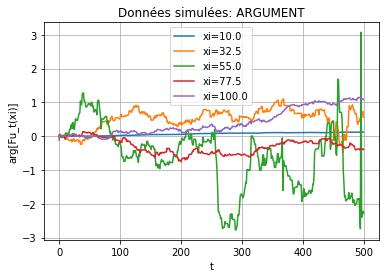

In [10]:
draw_log_arg(wt_sim,ximin=10,ximax=100,nbreaks_xi=5,tmax=500,n_renorm=5,titre="Données simulées: ARGUMENT")

$\to$ pentes toujours mauvaises pour les grandes valeurs de $\xi$.

# Conclusion

Si on ne considère que les petites valeurs de $\xi$: on obtient des pentes qui nous permettent d'estimer $a_{\xi}$ de manière sans doute satisfaisante.

Si on considère les grandes valeurs de $\xi$: on n'obtient plus de droite. Cela est assez mystérieux ; il s'agit probablement d'une erreur d'approximation, ou alors du fait que prendre des $\xi$ trop grands s'apparente, en fait, à faire de l'overfitting.